In [1]:
# Dependencies
import pandas as pd
import sqlite3

In [2]:
# Create connections to database
conn = sqlite3.connect("Data/Hotels.db")

#Load the database table into a pandas dataframe
popndf = pd.read_sql_query("select m.name, m.province, r.reviews_rating from metadata as m join ratings as r on m.name = r.Name;", conn)
conn.close()

# Preview the dataframe
popndf.head()

,name,province,reviews_rating
0,Rancho Valencia Resort Spa,CA,5.0
1,Rancho Valencia Resort Spa,CA,5.0
2,Rancho Valencia Resort Spa,CA,5.0
3,Aloft Arundel Mills,MD,2.0
4,Aloft Arundel Mills,MD,5.0


In [3]:
# Create a dictionary of state names and their abbreviations
state_abbr = sorted(list(set(popndf["province"])))
state_name = ["Alaska", "Arkansas", "Arizona", "California", "Colorado", "Connecticut", "Delaware", "Florida",
              "Georgia", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky",
              "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri",
              "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire",
              "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", 
              "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas",
              "Utah", "Virginia", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]

state_dict = dict(zip(state_abbr, state_name))
# Add a column containing state names
popndf["State"] = popndf["province"].map(state_dict)
popndf.head()

,name,province,reviews_rating,State
0,Rancho Valencia Resort Spa,CA,5.0,California
1,Rancho Valencia Resort Spa,CA,5.0,California
2,Rancho Valencia Resort Spa,CA,5.0,California
3,Aloft Arundel Mills,MD,2.0,Maryland
4,Aloft Arundel Mills,MD,5.0,Maryland


In [4]:
# Load the csv file in a dataframe
path = "Data/State_population_data.csv"

df = pd.read_csv(path)
df.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2018,POPEST18PLUS2018,PCNT_POPEST18PLUS
0,10,0,0,0,United States,327167434,253768092,77.6
1,40,3,6,1,Alabama,4887871,3798031,77.7
2,40,4,9,2,Alaska,737438,553622,75.1
3,40,4,8,4,Arizona,7171646,5528989,77.1
4,40,3,7,5,Arkansas,3013825,2310645,76.7


In [5]:
# Selecting only the columns that will be used in the analysis
df1 = df[['NAME','POPEST18PLUS2018']]

# Preview the dataframe
df1.head()

,NAME,POPEST18PLUS2018
0,United States,253768092
1,Alabama,3798031
2,Alaska,553622
3,Arizona,5528989
4,Arkansas,2310645


In [6]:
# Renaming the column name
df2 = df1[['NAME','POPEST18PLUS2018']]
df2.columns = ['State', 'Popn']
df2.head()

,State,Popn
0,United States,253768092
1,Alabama,3798031
2,Alaska,553622
3,Arizona,5528989
4,Arkansas,2310645


In [7]:
# merging common columns
df_merge_col = pd.merge(popndf, df2)

df_merge_col

,name,province,reviews_rating,State,Popn
0,Rancho Valencia Resort Spa,CA,5.00,California,30567090
1,Rancho Valencia Resort Spa,CA,5.00,California,30567090
2,Rancho Valencia Resort Spa,CA,5.00,California,30567090
3,Hotel Zelos,CA,3.00,California,30567090
4,Hotel Zelos,CA,4.00,California,30567090
5,Hotel Zelos,CA,5.00,California,30567090
6,Hotel Zelos,CA,5.00,California,30567090
7,Fairmont Grand Del Mar,CA,4.00,California,30567090
8,Fairmont Grand Del Mar,CA,4.00,California,30567090
9,Fairmont Grand Del Mar,CA,5.00,California,30567090


In [8]:
# grouping by population and State
review_count = df_merge_col.groupby(['Popn', 'State'],as_index=False).count()
review_count.head()

,Popn,State,name,province,reviews_rating
0,442962,Wyoming,114,114,114
1,510326,Vermont,14,14,14
2,553622,Alaska,21,21,21
3,581379,North Dakota,18,18,18
4,664629,South Dakota,121,121,121


In [9]:
# Groupby Avg reviews_ratings per state
Avg_review_state = df_merge_col.groupby('State',as_index=False)['reviews_rating'].mean()
Avg_review_state.head()

,State,reviews_rating
0,Alaska,3.333333
1,Arizona,3.833333
2,Arkansas,3.241611
3,California,3.943031
4,Colorado,4.057143


In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
g1 = df_merge_col.groupby("State", as_index=False).count()
g1.head()

,State,name,province,reviews_rating,Popn
0,Alaska,21,21,21,21
1,Arizona,324,324,324,324
2,Arkansas,149,149,149,149
3,California,1270,1270,1270,1270
4,Colorado,210,210,210,210


In [26]:
# Selecting only the columns that will be used in the analysis
g2 = g1[['State','reviews_rating']]

# Preview the dataframe
g2.head()

,State,reviews_rating
0,Alaska,21
1,Arizona,324
2,Arkansas,149
3,California,1270
4,Colorado,210


In [12]:
# Get population and reviews_ratings
Popn_data = list(review_count["Popn"])
ratings = list(review_count["reviews_rating"])
Popn_data

[442962,
 510326,
 553622,
 581379,
 664629,
 763555,
 832871,
 852102,
 1088000,
 1098288,
 1117077,
 1307236,
 1441672,
 1452427,
 1613275,
 2205544,
 2228643,
 2280389,
 2310645,
 2345395,
 2425378,
 2837472,
 2986593,
 3317146,
 3459573,
 3564062,
 3978182,
 4308564,
 4430329,
 4537465,
 4702570,
 4749622,
 5123748,
 5263790,
 5528989,
 5535291,
 5872306,
 6647893,
 6954877,
 7831247,
 8013724,
 8082975,
 9096117,
 9883814,
 10158149,
 15474107,
 17070244,
 21303746,
 30567090]

In [13]:
ratings

[114,
 14,
 21,
 18,
 121,
 56,
 144,
 5,
 138,
 123,
 212,
 156,
 102,
 115,
 123,
 120,
 40,
 135,
 149,
 541,
 232,
 54,
 229,
 222,
 397,
 424,
 448,
 130,
 210,
 297,
 941,
 282,
 435,
 581,
 324,
 476,
 269,
 1607,
 232,
 332,
 663,
 534,
 490,
 486,
 573,
 262,
 1158,
 526,
 1270]

Text(0, 0.5, 'No of Reviews')

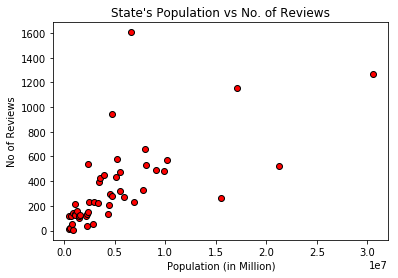

In [14]:
# Tell matplotlib to create a scatter plot based upon the above data

# Without scoop_price
plt.scatter(Popn_data, ratings, marker="o", facecolors="red", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("State's Population vs No. of Reviews")
plt.xlabel("Population (in Million)")
plt.ylabel("No of Reviews")

In [15]:
# Get population and reviews_ratings
State_data = list(review_count["State"])
ratings = list(review_count["reviews_rating"])
State_data

['Wyoming',
 'Vermont',
 'Alaska',
 'North Dakota',
 'South Dakota',
 'Delaware',
 'Montana',
 'Rhode Island',
 'Maine',
 'New Hampshire',
 'Hawaii',
 'Idaho',
 'West Virginia',
 'Nebraska',
 'New Mexico',
 'Kansas',
 'Utah',
 'Mississippi',
 'Arkansas',
 'Nevada',
 'Iowa',
 'Connecticut',
 'Oklahoma',
 'Oregon',
 'Kentucky',
 'Louisiana',
 'South Carolina',
 'Minnesota',
 'Colorado',
 'Wisconsin',
 'Maryland',
 'Missouri',
 'Indiana',
 'Tennessee',
 'Arizona',
 'Massachusetts',
 'Washington',
 'Virginia',
 'New Jersey',
 'Michigan',
 'Georgia',
 'North Carolina',
 'Ohio',
 'Illinois',
 'Pennsylvania',
 'New York',
 'Florida',
 'Texas',
 'California']

In [16]:
ratings

[114,
 14,
 21,
 18,
 121,
 56,
 144,
 5,
 138,
 123,
 212,
 156,
 102,
 115,
 123,
 120,
 40,
 135,
 149,
 541,
 232,
 54,
 229,
 222,
 397,
 424,
 448,
 130,
 210,
 297,
 941,
 282,
 435,
 581,
 324,
 476,
 269,
 1607,
 232,
 332,
 663,
 534,
 490,
 486,
 573,
 262,
 1158,
 526,
 1270]

In [17]:
# Create an array that contains the number of users each language has
x_axis = np.arange(len(ratings))

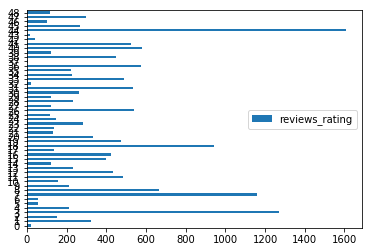

In [30]:
g2.plot(kind='barh')


In [33]:
# Get population and reviews_ratings from merged column
Population_data = list(df_merge_col["Popn"])
reviewrating = list(df_merge_col["reviews_rating"])
Population_data

[30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,
 30567090,

In [34]:
reviewrating

[5.0,
 5.0,
 5.0,
 3.0,
 4.0,
 5.0,
 5.0,
 4.0,
 4.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 3.15,
 3.55,
 3.75,
 3.75,
 3.75,
 4.4,
 4.4,
 4.4,
 4.6,
 4.6,
 4.8,
 4.8,
 4.8,
 4.8,
 4.8,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 3.15,
 3.25,
 3.35,
 3.55,
 3.75,
 4.15,
 4.4,
 4.4,
 4.4,
 4.8,
 5.0,
 2.3,
 2.5,
 2.5,
 2.7,
 2.7,
 2.9,
 2.9,
 3.15,
 3.15,
 3.5,
 3.75,
 3.75,
 3.75,
 3.95,
 4.15,
 4.15,
 4.15,
 4.4,
 4.4,
 4.4,
 4.4,
 4.4,
 4.6,
 4.6,
 4.6,
 4.6,
 4.6,
 4.6,
 4.6,
 4.6,
 4.6,
 4.6,
 4.6,
 4.6,
 4.6,
 4.6,
 4.6,
 4.75,
 4.8,
 4.8,
 4.8,
 4.8,
 4.8,
 4.8,
 4.8,
 4.8,
 4.8,
 4.8,
 4.8,
 4.8,
 4.8,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 2.0,
 3.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 3.0,
 3.0,
 3.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 

Text(0, 0.5, 'Review ratings')

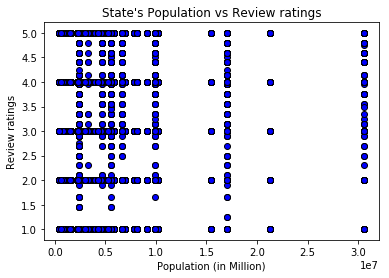

In [39]:
# Tell matplotlib to create a scatter plot based upon the above data

# Without scoop_price
plt.scatter(Population_data, reviewrating, marker="o", facecolors="blue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("State's Population vs Review ratings")
plt.xlabel("Population (in Million)")
plt.ylabel("Review ratings")

In [40]:
# Without a constant
import statsmodels.api as sm

In [43]:
# Note the difference in argument order
model = sm.OLS(ratings, Popn_data).fit()
predictions = model.predict(Popn_data)

In [44]:
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     96.88
Date:                Tue, 12 Mar 2019   Prob (F-statistic):           4.25e-13
Time:                        19:32:42   Log-Likelihood:                -344.03
No. Observations:                  49   AIC:                             690.1
Df Residuals:                      48   BIC:                             691.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          5.043e-05   5.12e-06      9.843      0.000    4.01e-05    6.07e-05
==============================================================================
Omnibus:                       36.763   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.084
Skew:                           1.739   Prob(JB):                     5.23e-37
Kurtosis:                      11.351   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

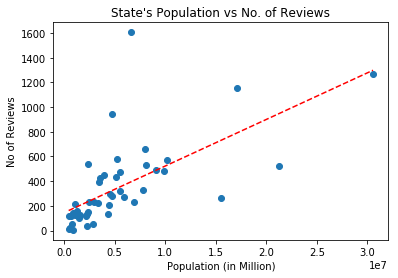

In [55]:

x = Popn_data
y = ratings
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

# Create a title, x label, and y label for our chart
plt.title("State's Population vs No. of Reviews")
plt.xlabel("Population (in Million)")
plt.ylabel("No of Reviews")

plt.show()